<a href="https://colab.research.google.com/github/NikolaevMikhailRoma/Other-Projects/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B0%D1%83%D0%B4%D0%B8%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Условие:**
Преобразовать в одну функцию распознавание речи с микрофона при помощи google 
API. Функция должна возвращать распознанный текст.

In [1]:
# Ваше решение

%%capture

# Библиотека с популярными сервисами распознавания речи
!pip install SpeechRecognition

# Модуль метрики качества распознавания речи
!pip install jiwer

# Кроссплатформенная open-source библиотека для обработки видео- и аудиофайлов
!pip install ffmpeg-python

In [2]:
# Библиотека с популярными сервисами распознавания речи
import speech_recognition as sR

# Модуль метрики качества распознавания речи
from jiwer import wer

# Кроссплатформенная open-source библиотека для обработки видео- и аудиофайлов
import ffmpeg 

# Библиотека matplotlib
from matplotlib import pyplot as plt

# Импортируем модули HTML и Audio чтобы обратиться к HTML для записи аудио с микрофона в ноутбуке colab
from IPython.display import HTML, Audio

# Библиотека для запуска кода javascript
from google.colab.output import eval_js

# Модуль для кодировки/раскодировки аудиозаписи(64-разрядный код)
from base64 import b64decode 

# Модуль для чтения WAV формата
from scipy.io.wavfile import read as wav_read

# Модуль для работы с бинарными данными
import io

# Библиотека для работы со звуковой дорожкой
import scipy

# Модуль для работы с каталогами
import os 

# Модуль для разбивки данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Модуль для проигрывания аудио
import IPython.display as ipd 

# Загрузка датасетов из облака google
import gdown

In [3]:
def recognizeAudio(filename, 
                   offset=None, 
                   duration=None):
  
  ''' 
  Функция для распознавания речи

  Args:
      filename - аудиофайл с записанной речью, wav
      offset - с какой секунды начать распознавание, int
      duration - длина распознаваемого фрагмента, int

  Returns:
      распознанный текст, str
  '''

  # Задаем путь к аудиофайлу
  AUDIO_FILE = os.path.join(filename)             
  
  # Создаем объект класса Recognizer
  r = sR.Recognizer()                             
    
  # Считываем аудиофайл
  with sR.AudioFile(AUDIO_FILE) as source:
    audio = r.record(source,                      
                     offset=offset, 
                     duration=duration)

  # Запускаем распознавание
  return r.recognize_google(audio, language='ru') 

## Распознавание речи, записанной с микрофона в ноутбуке colab

В следующей ячейке находится код на языке javascript с элементами html. Он нужен для записи голоса через микрофон из среды colaboratory. Если Вы не знаете javascript, то его можно просто копировать в любой другой ноутбук, когда Вам необходимо сделать запись через микрофон в colab.

In [4]:
AUDIO_HTML = """
<script>                                                      // создаем тег <script>, сообщающий браузеру о том, что внутри находится исполняемый код JavaScript
var my_div = document.createElement("DIV");                   // создаем новый элемент DIV(тег-контейнер для логического выделения блока документа)
var my_p = document.createElement("P");                       // создаем новый элемент P(параграф для логической группировки текста)
var my_btn = document.createElement("BUTTON");                // создаем новый элемент(кнопку) BUTTON
var t = document.createTextNode("Нажмите старт для записи");  // создаем текстовое содержимое для кнопки

my_btn.appendChild(t);                                        // добавляем текстовое содержимое элементу BUTTON
my_div.appendChild(my_btn);                                   // кнопку с текстом BUTTON добавляем в блок DIV
document.body.appendChild(my_div);                            // добавляем наш блок в элемент <body>("тело", для хранения содержимого веб-страницы)

var base64data = 0;                                           // будем использовать для аудиоданных метод кодирования информации в 64-разрядный код
var reader;                                                   // создаем переменную для чтения файла
var recorder, gumStream;                                      // объявляем переменные для записи данных/потока
var recordButton = my_btn;                                    // создаем переменную для кнопки записи аудио с микрофона

var handleSuccess = function(stream) {                        // объявляем функцию для работы с потоками данных
  gumStream = stream;                                         // создаем переменную для потока
  var options = {
    mimeType : 'audio/webm;codecs=opus'                       // в опциях задаем медиа тип с аудиоформатом и кодеками
  };            
  recorder = new MediaRecorder(stream);                       // создаем новый объект MediaRecorder, получающий медиапоток для записи.
                                                              // MediaRecorder - интерфейс MediaStream Recording API представляющий функциональность для простой записи медиа. Создается..
                                                              // ..с использованием MediaRecorder() конструктора.
  recorder.ondataavailable = function(e) {                    // вызываем обработчик dataavailable события, запускаемое по окончанию записи          
    var url = URL.createObjectURL(e.data);                    // этим методом создаем DOMString(UTF-16 String), содержащий URL с указанием на объект e.data
    var preview = document.createElement('audio');            // создаем элемент-тег аудио
    preview.controls = true;                                  // активизируем элементы управления
    preview.src = url;                                        // берем в кач-ве исходных данных файл, содержащийся в записанной ранее URL
    document.body.appendChild(preview);                       // добавляем элемент аудио в <body>("тело", для хранения содержимого веб-страницы)

    reader = new FileReader();                                // создаем объект класса FileReader для чтения разных источников данных
    reader.readAsDataURL(e.data);                             // читаем содержимое указанного файла
    reader.onloadend = function() {                           // обработчик события, запускаемого после передачи данных
      base64data = reader.result;                             // записываем прочитанное содержимое в base64data
    }
  };
  recorder.start();  // начало записи медиа
  };

// такой текст будет на кнопке BUTTON во время записи аудио
recordButton.innerText = "Идёт запись... нажмите для остановки"; 

// запрос разрешения пользователя на доступ к устройству захвата аудио(микрофон), указываем True
navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {                                  // функция опишет действия по завершению записи (после клика мышкой по кнопке "Recording... press to stop")
  if (recorder && recorder.state == "recording") {            // если рекордер находится в процессе записи 
      recorder.stop();  // рекордер прерывается
      gumStream.getAudioTracks()[0].stop();                   // отключается запись и доступ к микрофону
      recordButton.innerText = "Идёт сохранение записи..."    // эта надпись(сохранение записи) отобразится на кнопке BUTTON 
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {                                          // создаем функцию с задержкой вызова
  return new Promise(resolve => setTimeout(resolve, ms));  

  // new Promise - конструкция для отложенных вычислений
  // setTimeout позволяет вызвать функцию один раз через определённый интервал времени
}

var data = new Promise(resolve=>{
recordButton.onclick = ()=>{      // при нажатии левой кнопкой мыши на кнопку "Recording... press to stop"
toggleRecording()                 // вызывается функция завершения аудиозаписи

sleep(2000).then(() => {          // и после задержки 2000мс(2 сек)
  resolve(base64data.toString())  // полученные данные из формата base64 преобразовываем в строку

});

}
});
      
</script>
"""

Далее определим функцию get_audio(), которая запишет нашу речь через микрофон и сохранит её в виде сигнала.

Функция get_audio() довольна сложна для понимания. Мы используем её только в том случае, если хотим записывать аудио через микрофон внутри колаба. Если Вы будете работать в локальной среде, например в jupyter или PyCharm, то запись через микрофон делается намного проще. Вот ссылка на такую инструкцию:

https://dev-gang.ru/article/vvedenie-v-raspoznavanie-reczi-s-python-uxr050lia2/

In [5]:
def get_audio():
  ''' 
  Функция извлечения аудио, записанного через микрофон в ноутбуке

  Args:

  Returns:
      audio - полученный сигнал, n (количство отчетов)
      sr    - частота дискретизации, Гц
  '''
  display(HTML(AUDIO_HTML))              # С помощью модулей библиотеки IPython отображаем результат выполнения скрипта AUDIO_HTML
  data = eval_js("data")                 # Данные на выходе запишем в data как результат выполнения javascript кода
  binary = b64decode(data.split(',')[1]) # Отсекаем ненужную информацию, оставляем только данные и декодируем

  # Зададим параметры для конвертации
  process = (ffmpeg
    .input('pipe:0')                   # Pipe стандартного ввода
    .output('pipe:1', format='wav')    # Pipe стандартного вывода в формате wav 
    .run_async(pipe_stdin=True,        # Подключение pipe к stdin
               pipe_stdout=True,       # Подключение pipe к stdout
               pipe_stderr=True,       # Подключение pipe к stderr
               quiet=True,             # Сокращение для настройки capture_stdout и capture_stderr
               overwrite_output=True)) # Перезаписать выходные файлы без запроса

  # binary преобразуем в wav, с типичным для медиафайлов форматом RIFF
  output, err = process.communicate(input=binary)

  # Размер заголовка секции RIFF - 8 байт, их ниже уберём из определения размера секции RIFF
  riff_chunk_size = len(output) - 8 

  # Разбиваем размер секции на четыре байта, которые запишем далее в b.
  q = riff_chunk_size
  b = [] 
  for i in range(4):        # Запустим цикл 4 раза
      q, r = divmod(q, 256) # Возьмем размер секции и вернем частное и остаток от деления на 256
      b.append(r)           # Каждый из остатков добавим в список

  # Меняем байты c 4го по 7й вкл-но в output на b
  riff = output[:4] + bytes(b) + output[8:]

  # Извлечём частоту дискретизации и полученный сигнал
  sr, audio = wav_read(io.BytesIO(riff)) 

  return audio, sr # Функция вернет полученный сигнал и частоту дискретизации

Для начала записи через микрофон нужно запустить следущую ячейку. Когда захотите остановить запись, то нажмите на появившуюся после ячейки кнопку "Идёт запись... нажмите для остановки"

**Важно:** обязательно включите разрешение на использование микрофона на этой странице!

Обычно это происходит автоматически, либо при первом запуске следующей ячейки всплывает разрешение в левом верхнем углу браузера.

In [14]:
# Запишем аудио через микрофон
audio, sr = get_audio() 

In [15]:
# Сохраним запись в формате wav
scipy.io.wavfile.write('recording1.wav', sr, audio)

Так как запись сохраняется в виде сигнала, мы можем построить график этого сигнала

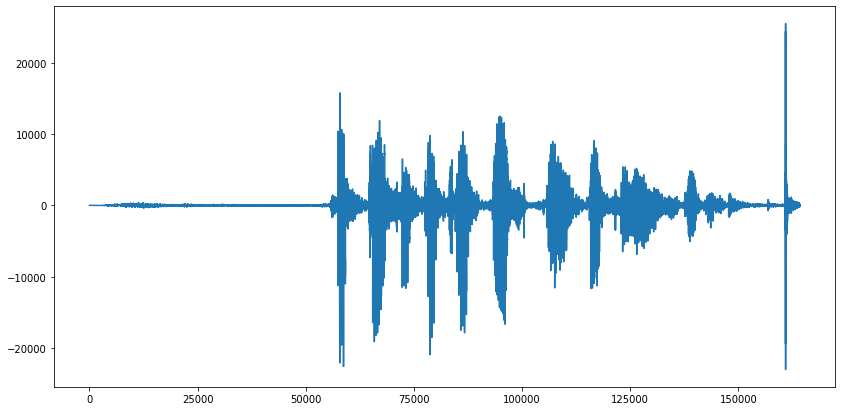

In [16]:
# Выведем график сигнала на экран
plt.figure(figsize=(14,7))
plt.plot(audio)
plt.show()

Также, мы можем выделять фрагменты аудио прямым указанием с какого по какой отчет мы хотим вывести, например:

In [17]:
ipd.Audio(data=audio[25000:55000], rate = sr)

In [18]:
# Проверим результат работы

original = 'проверка микрофона'
res = recognizeAudio('recording1.wav', duration=None)

print('Оригинал:               ', original)
print('Результат распознавания:', res)
print('WER:', wer(original.lower(), res.lower()))


result2:
{   'alternative': [   {   'confidence': 0.88689297,
                           'transcript': 'от опыта копыт пыль летит'},
                       {'transcript': 'от опыта копыт пыль популя летит'},
                       {'transcript': 'от опыта копыт пылью летит'},
                       {'transcript': 'от опыта копыт пыль популяриза летит'}],
    'final': True}
Оригинал:                проверка микрофона
Результат распознавания: от опыта копыт пыль летит
WER: 2.5
